In [ ]:
print('Python_Lesson_7')
print('Предобработка данных и построение предиктивных моделей в Scikit-learn')

print('\ntask_1')
print('1. Взять все признаки из датасета с урока. Применить модель Random Forest.')
print('-' * 77)

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn.preprocessing import Normalizer, StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2
from sklearn.ensemble import RandomForestRegressor

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

In [25]:
boston_data = load_boston()

X = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
y = boston_data.target

X.head()

c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [28]:
X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.20, shuffle = True, random_state = 42)

In [30]:
# обучение модели
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
print('\ntask_2')
print('2. Рассчитайте MAE, MSE, R2 на тренировочной и тестовой выборке.')
print('-' * 77)

In [31]:
# предсказания зависимой переменной у на тестовом и обучающем наборе
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [33]:
# метрики качества на тестовом и обучающем множестве
print('MAE train:', mae(y_train, y_train_pred))
print('MAE test:', mae(y_test, y_test_pred))

print('MSE train:', mse(y_train, y_train_pred))
print('MSE test:', mse(y_test, y_test_pred))

print('R2 train:', r2(y_train, y_train_pred))
print('R2 test:', r2(y_test, y_test_pred))

MAE train: 0.903477722772276
MAE test: 2.0395392156862746
MSE train: 1.9783925024752465
MSE test: 7.901513892156864
R2 train: 0.9772267182453291
R2 test: 0.8922527442109116


C:\Users\Admin\AppData\Local\Temp\ipykernel_10680\94803556.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,50], [0,50], '--k', color='black', linewidth=2)


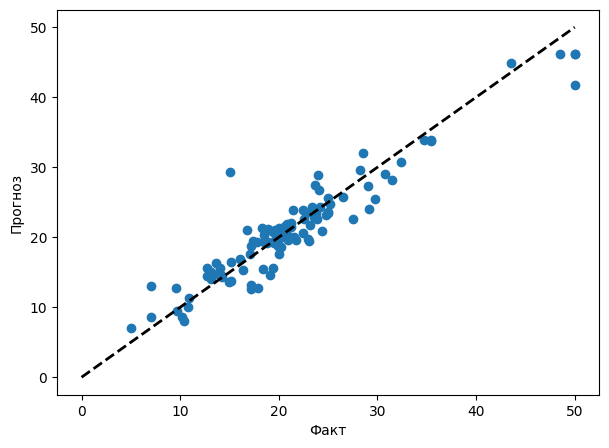

In [42]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_test_pred)
plt.plot([0,50], [0,50], '--k', color='black', linewidth=2)
plt.xlabel('Факт')
plt.ylabel('Прогноз')
plt.show()

In [43]:
# пробуем настроить гиперпараметры
def fit_predict(train, test, y_train, y_test, criterion = 'squared_error', n_estimators = 100, max_depth = None, min_sample_split = 2):  # пайтон на criterion = 'mse' выдал ошибку и сказал заменить на criterion = 'squared_error'
  rf = RandomForestRegressor(criterion=criterion, n_estimators=n_estimators, max_depth=max_depth)
  rf.fit(train, y_train)
  y_pred_train = rf.predict(train)
  y_pred = rf.predict(test)
  print('train', r2(y_train, y_pred_train), 'test', r2(y_test, y_pred))

In [44]:
# максимальная глубина деревьев
for max_depth in range(2,21):
  print('R^2 score using max_depth={0}:'.format(max_depth), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth = max_depth)

R^2 score using max_depth=2: train 0.7685959613003726 test 0.7150702040419343
R^2 score using max_depth=3: train 0.868428765001083 test 0.824394199612097
R^2 score using max_depth=4: train 0.9094601084960758 test 0.8609610037747432
R^2 score using max_depth=5: train 0.9335489637085904 test 0.8565990432902342
R^2 score using max_depth=6: train 0.9469124612192968 test 0.8634092426301742
R^2 score using max_depth=7: train 0.9628088939896358 test 0.8819010278921482
R^2 score using max_depth=8: train 0.965924038404518 test 0.8816703190982267
R^2 score using max_depth=9: train 0.9723425008944394 test 0.8671037178785055
R^2 score using max_depth=10: train 0.9738947696709038 test 0.8704612826347384
R^2 score using max_depth=11: train 0.9736043619141171 test 0.8737022827225635
R^2 score using max_depth=12: train 0.976990934523245 test 0.8997562263370306
R^2 score using max_depth=13: train 0.979701396836351 test 0.9001798919361392
R^2 score using max_depth=14: train 0.9786444162336841 test 0.885

In [45]:
# минимальное число объектов, чтобы узел дерева расщепился
for min_sample_split in range(5,51,5):
  print('R^2 score using min_sample_leaf = {0}:'.format(min_sample_split), end = ' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=min_sample_split)

R^2 score using min_sample_leaf = 5: train 0.8727016064171602 test 0.8326513729226415
R^2 score using min_sample_leaf = 10: train 0.8718002163616676 test 0.8189008300933607
R^2 score using min_sample_leaf = 15: train 0.8698276092671828 test 0.8262582147946033
R^2 score using min_sample_leaf = 20: train 0.8720722916241705 test 0.8227672669777278
R^2 score using min_sample_leaf = 25: train 0.8665261269654274 test 0.812387119058618
R^2 score using min_sample_leaf = 30: train 0.8699212462895334 test 0.8278180954017498
R^2 score using min_sample_leaf = 35: train 0.8711924734908293 test 0.8283268316670411
R^2 score using min_sample_leaf = 40: train 0.8699258763682765 test 0.8286967066659191
R^2 score using min_sample_leaf = 45: train 0.8700869485055782 test 0.8163911035830482
R^2 score using min_sample_leaf = 50: train 0.8654851254209032 test 0.8190257328617832


In [46]:
# критерий расщепления
for criterion in ['squared_error', 'absolute_error']:  # Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  print('R^2 score using {0} criterion:'.format(criterion), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=15, criterion=criterion)

R^2 score using squared_error criterion: train 0.875189847136007 test 0.824979817260115
R^2 score using absolute_error criterion: train 0.837543808259377 test 0.7980250054596237


In [47]:
# число "деревьев" в "случайном лесу"
for n_estimators in range(100,1001,100):
  print('R^2 score using n_estimators = {0}:'.format(n_estimators), end=' ')
  fit_predict(X_train, X_test, y_train, y_test, max_depth=3, min_sample_split=15, criterion='squared_error', n_estimators=n_estimators)

R^2 score using n_estimators = 100: train 0.8728719045565938 test 0.8444485796312907
R^2 score using n_estimators = 200: train 0.8694986905928973 test 0.8210239384574421
R^2 score using n_estimators = 300: train 0.8694044043927773 test 0.8201494466502206
R^2 score using n_estimators = 400: train 0.8700206270239966 test 0.8261170307659641
R^2 score using n_estimators = 500: train 0.8713816671499329 test 0.8287154716503049
R^2 score using n_estimators = 600: train 0.8701234462362938 test 0.8270147075699421
R^2 score using n_estimators = 700: train 0.8697136817917894 test 0.8202310233056063
R^2 score using n_estimators = 800: train 0.8682764291925182 test 0.8198036965072348
R^2 score using n_estimators = 900: train 0.8689959600190915 test 0.8243004132410434
R^2 score using n_estimators = 1000: train 0.8685206074535843 test 0.8216633346227508


In [48]:
model2 = RandomForestRegressor(criterion='squared_error', n_estimators=300, max_depth=3, random_state=5, min_samples_split=15)

model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, min_samples_split=15, n_estimators=300,
                      random_state=5)

In [49]:
y_train_pred2=model2.predict(X_train)
y_test_pred2=model2.predict(X_test)

print('R2 train:', r2(y_train, y_train_pred2))
print('R2 test:', r2(y_test, y_test_pred2))

R2 train: 0.8685861956584837
R2 test: 0.8248676153984816


In [27]:
# 2-й вариант загрузки
#boston_data = load_boston()
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None, engine='python')
data1 = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
col = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
boston = pd.DataFrame(data1, columns=col)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<AxesSubplot: >

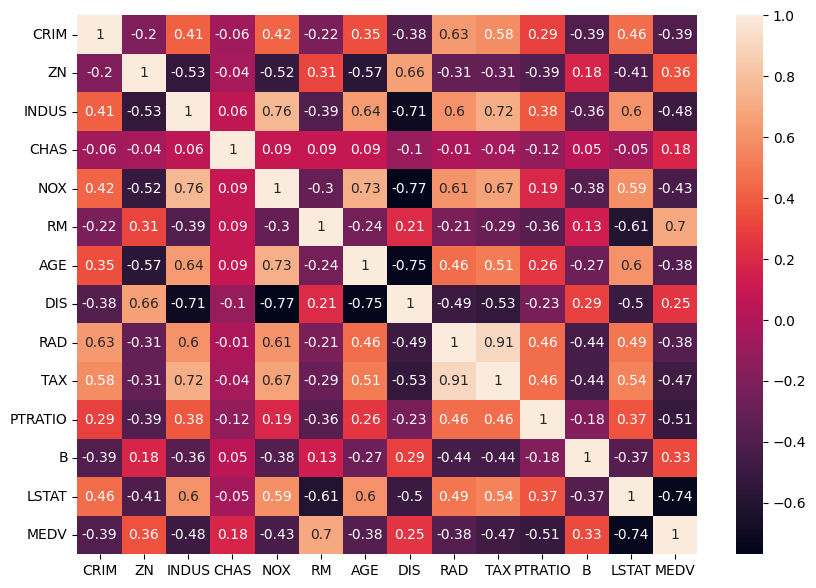

In [50]:
x = boston
y = target
x_corr = x.copy()
x_corr['MEDV'] = y
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(10, 7))
sns.heatmap(data=correlation_matrix, annot=True)

In [51]:
features = [['LSTAT', 'RM'], ['LSTAT', 'RM', 'PTRATIO'], ['LSTAT', 'RM', 'PTRATIO', 'TAX'], ['DIS', 'AGE'],
            ['DIS', 'RAD']]

In [52]:
#Оцениваем результат
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])